# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`** и html-версии графиков (подробности в условии).
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [1]:
# Bot check

# HW_ID: fpmi_ad2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.graph_objects as go
import plotly.express as px
import folium

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="https://www.yelp.com/">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

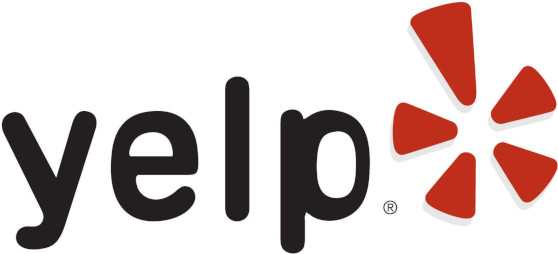

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>, но использовать нужно выданные данные.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.


*Далее в условии встречаются различные подсказки, как можно выполнить определенные части задачи. Вы можете их игнорировать и делать иным способом для получения **того же самого промежуточного результата**. Однако, если ваше решение окажется **значительно** менее эффективным (по скорости, количеству и красоте кода) по сравнению с предполагаемым, баллы могут быть снижены.* 

------

#### 1. Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [3]:
ds = pd.read_csv('yelp_data/yelp_business.csv')
ds.head(5)

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [4]:
top_city = ds.groupby('city').size().sort_values(ascending=0)
top_city[:5]

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
dtype: int64

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

In [5]:
ds = ds[ds['city'] == 'Las Vegas']
ds.head(5)

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
6,6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,1,Real Estate Services;Real Estate;Home Services...
7,7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1,Shopping;Sporting Goods
26,26,VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",Las Vegas,NV,89119,36.085051,-115.119421,1,Shopping;Jewelry;Watch Repair;Local Services
41,41,1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",Las Vegas,NV,89113,36.056382,-115.269332,1,Home Services;Lighting Fixtures & Equipment;Lo...
48,48,DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""",Las Vegas,NV,89122,36.105196,-115.056880,1,Nurseries & Gardening;Home & Garden;Shopping


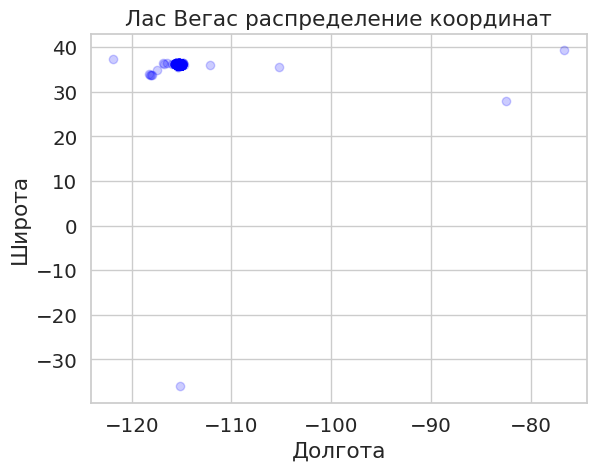

In [6]:
plt.scatter(ds["longitude"], ds["latitude"], color="b", alpha=0.2)
plt.title("Лас Вегас распределение координат")
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

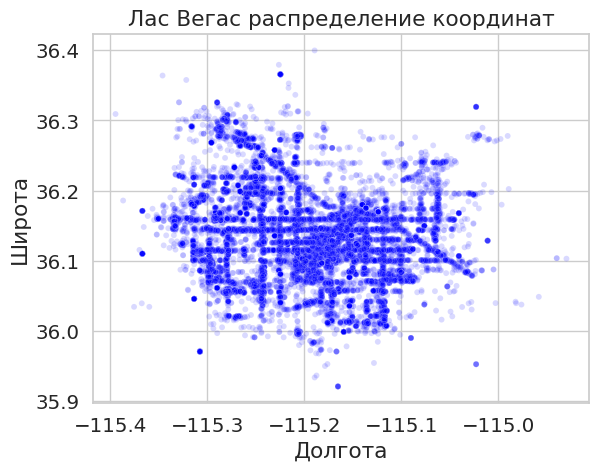

In [7]:
longitude_mn, longitude_mx = -115.4, -114.9
latitude_mn, latitude_mx = 35.8, 36.4
mask_long = (longitude_mx >= ds['longitude']) & (ds['longitude'] >= longitude_mn)
mask_lat = (latitude_mx >= ds['latitude']) & (ds['latitude'] >= latitude_mn)
ds = ds[mask_long & mask_lat]
sns.scatterplot(ds, x=ds["longitude"], y=ds["latitude"], color="b", size=1, alpha=0.15)
plt.title("Лас Вегас распределение координат")
plt.legend([],[],frameon=False)
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.show()

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб, и его не получится отправить боту. В любом случае **<u>необходимо сохранить карту в html и отправить ее отдельным файлом в бот.</u>** При этом каждый файл html должен не превышать 20 Мб, присылать файлы в архиве нельзя. Аналогично со всеми следующими интерактивными графиками в этом задании.

In [8]:
fig = px.scatter_mapbox(ds, lat="latitude", lon="longitude", hover_name='name',
                            hover_data = ['address', "categories"], size_max=1, zoom=10, mapbox_style="carto-positron", title='Расположение заведений в Лас-Вегасе')
plotly.offline.plot(fig, filename='la_map.html', auto_open = False)

'la_map.html'

Если все получилось, вы молодцы! Далее в этой задаче тоже стройте интерактивные карты. Если нет желания разбираться с интерактивными графиками, можно построить статичные, но баллы будут снижены.

#### 2. Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [9]:
review = pd.read_csv('yelp_data/yelp_review.csv')
review

,Unnamed: 0,business_id,stars
0,0,AEx2SYEUJmTxVVB18LlCwA,5
1,1,VR6GpWIda3SfvPC-lg9H3w,5
2,2,CKC0-MOWMqoeWf6s-szl8g,5
3,3,ACFtxLv8pGrrxMm6EgjreA,4
4,4,s2I_Ni76bjJNK9yG60iD-Q,4
...,...,...,...
5261663,5261663,Ngk84Ax1tXgpoJFEGxot3w,1
5261664,5261664,pOEL97ld-FJMKO8Ki8JmYg,3
5261665,5261665,5ubokMNw8qfbX2WtxgJG1Q,4
5261666,5261666,EO3i5kTUG7_S2OIQ23sdSA,3


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [10]:
review_la = review.set_index('business_id').loc[ds['business_id']]
review_la

,Unnamed: 0,stars
business_id,,
kCoE3jvEtg6UVz5SOD3GVw,456053,4
kCoE3jvEtg6UVz5SOD3GVw,1093900,1
kCoE3jvEtg6UVz5SOD3GVw,2039047,5
kCoE3jvEtg6UVz5SOD3GVw,2979380,5
kCoE3jvEtg6UVz5SOD3GVw,4844650,5
...,...,...
9ouC6BpmjFpLfHeQnLQqng,4857506,5
9ouC6BpmjFpLfHeQnLQqng,5256464,5
n9a-3YhibkMDUEgncIivHg,779637,5


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [11]:
review_la = review_la.groupby('business_id')['stars'].agg(['mean', 'count'])
review_la.head(5)

,mean,count
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19


Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [12]:
review_la = review_la.rename(columns={'mean': 'avg_rating', 'count': 'count_review'})
display(review_la)

,avg_rating,count_review
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19
...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4
zzjqFOujmM9surbMANZ_ag,5.000000,3


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, а также две колонки со средней оценкой компаний и количеством оценок, которые вы посчитали выше.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [13]:
ds = ds.set_index('business_id')
all_values = ds.join(review_la, on = 'business_id')
all_values = all_values[["name", "categories", "longitude", "latitude", "avg_rating", "count_review"]]
all_values

,name,categories,longitude,latitude,avg_rating,count_review
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Real Estate Services;Real Estate;Home Services...,-115.268460,36.207430,4.000000,5
OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",Shopping;Sporting Goods,-115.249660,36.197484,1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Shopping;Jewelry;Watch Repair;Local Services,-115.119421,36.085051,4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Home Services;Lighting Fixtures & Equipment;Lo...,-115.269332,36.056382,4.450000,20
DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",Nurseries & Gardening;Home & Garden;Shopping,-115.056880,36.105196,3.680000,25
...,...,...,...,...,...,...
swjz4q8gI79Ndg4APuHEUA,"""Stonegate Real Estate Services""",Real Estate Services;Home Services;Property Ma...,-115.224462,36.134355,4.466667,15
pUhU5ohYv65g8B47dTXAKA,"""Starbucks""",Coffee & Tea;Food,-115.116779,36.173589,2.400000,35
sH9WsMj8sNTTSAUWv4UEEg,"""Sprint Store""",Mobile Phone Accessories;Mobile Phones;Electro...,-115.243488,36.055130,3.857143,35


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$. Если у одной компании несколько филиалов с разными адресами, наносите на график все адреса.

In [14]:
fig = px.scatter_mapbox(
    all_values,
    lat="latitude",
    lon="longitude",
    hover_name = "name",
    size_max = 20,
    opacity = 0.2,
    hover_data = ["categories"],
    color = "avg_rating",
    mapbox_style="carto-positron",
    zoom=10,
    title='Карта Лас-Вегаса с рейтингом заведений'
)


fig.write_html("la_map_with_ratings.html")

# fig.show()

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [15]:
round_best_for_area = 2.0
all_values['longitude'] = np.round(all_values['longitude']*round_best_for_area, decimals=1)/(round_best_for_area)
all_values['latitude'] = np.round(all_values['latitude']*2, decimals=1) / round_best_for_area
all_values.head(5)

,name,categories,longitude,latitude,avg_rating,count_review
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Real Estate Services;Real Estate;Home Services...,-115.25,36.20,4.000000,5
OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",Shopping;Sporting Goods,-115.25,36.20,1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Shopping;Jewelry;Watch Repair;Local Services,-115.10,36.10,4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Home Services;Lighting Fixtures & Equipment;Lo...,-115.25,36.05,4.450000,20
DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",Nurseries & Gardening;Home & Garden;Shopping,-115.05,36.10,3.680000,25


Для получения средней оценки компаний по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

*Замечание.* В качестве среднего можно было бы посчитать как общее среднее по всем оценкам всех компаний, так и среднее по компаниям их средних оценок. В чем разница этих подходов? Какой из них необходимо использовать в данном случае?

**Ответ: в данном случае выгодно считать среднее по средним оценкам компаниям, тк на каждую компанию оставили разное количество оценок и вносит одна компания в итоговый ответ разный вес, что очевидно для оценки одного района неверно. В данном случае тк мы хотим найти среднее по району будем использовать 2 подход, он более точно оценит качество заведения и не будет так что одно заведение с 1000 отзывов отличных перекроет 100 заведений с 1 плохим отзывом.**

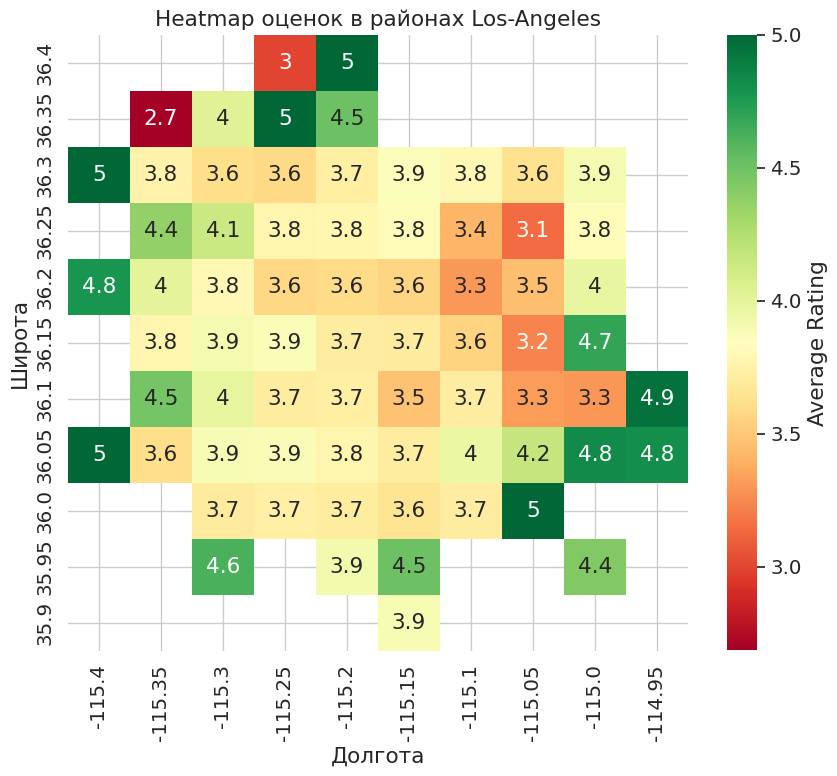

In [16]:
pivot_table = pd.pivot_table(
    all_values,
    values="avg_rating",
    index="latitude",
    columns="longitude",
    aggfunc="mean"
)[::-1]

plt.figure(figsize=(10, 8))

sns.heatmap(
    pivot_table,
    cmap="RdYlGn",
    annot=True,
    cbar_kws={"label": "Average Rating"},
)
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.title("Heatmap оценок в районах Los-Angeles")
plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:\
1)у каждого человека свои вкусы и если на заведение очень мало отзывов, то и заведение расценивается наравне с остальными, вносит вклад в общую оценку района, а также дает ложное представление о качестве, ведь для одного плюс-для другого большой минус => требуется сделать отсев по количеству отзывов, тк недостаточное описание может стать существенным минусом, а также такое маленькое количество отзывов может быть "накручено".\
2)если разбиение по районам имеет рейтинг от 4.5 до 5, то все районы считаются хорошими у потребителей, но heatmap покрасит его в красный цвет, что для заказчика будет плохим цветом => сделаются неправильные выводы потребителем.**

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

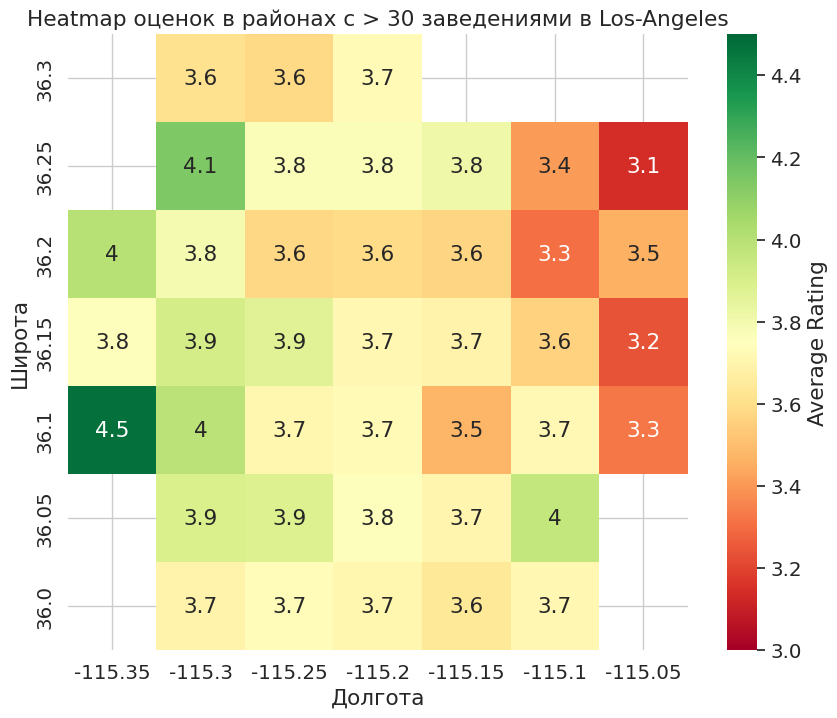

In [17]:
result = all_values.groupby(['latitude', 'longitude']).filter(lambda x: len(x) >= 30)

pivot_table = pd.pivot_table(
    result,
    values="avg_rating",
    index="latitude",
    columns="longitude",
    aggfunc="mean"
)[::-1]

plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot_table,
    cmap="RdYlGn",
    cbar_kws={"label": "Average Rating"},
    vmin=3,
    annot=True,
    vmax=4.5,
)
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.title("Heatmap оценок в районах c > 30 заведениями в Los-Angeles")
plt.show()

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:**
**Cравнивая два графика можно заметить, что в районах центральных немного возросла оценка, но значительных измпнений невидно, связано это с тем, что "плохие" места были удалены из выборки. Также районов с высокими оценками значительно уменьшилось, это связано с тем, что были убраны места в которых, возможно, намеренно завысили отзывы => повысилась полезность средней оценки района, как и средняя оценка района. Также средняя оценка компаний на западе выше, чем на востоке Лос Анджелеса.**

#### 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

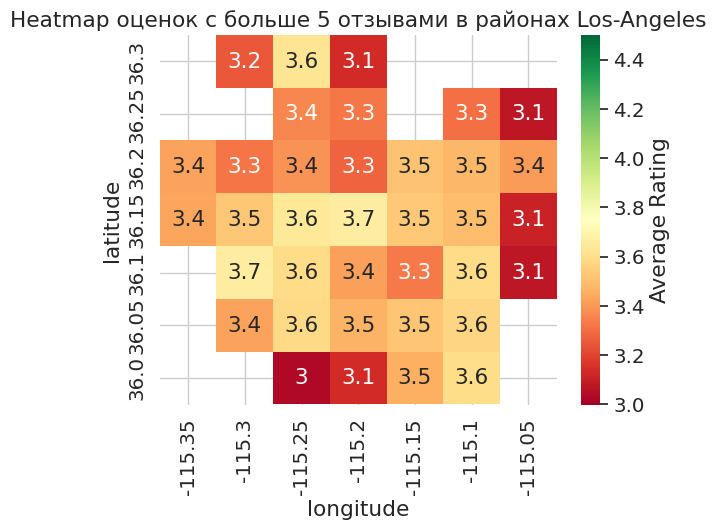

In [18]:
all_rest = all_values[all_values["categories"].str.lower().str.contains('restaurant')]
df_count = all_rest[all_rest['count_review'] > 5]

df_dist = df_count.copy()
df_dist['latitude'] = np.round(df_count['latitude'] * 2, decimals=1) / 2.0
df_dist['longitude'] = np.round(df_count['longitude'] * 2, decimals=1) / 2.0

df_count = df_dist.groupby(by=['latitude', 'longitude']).size().reset_index(name='count')
df_mean = df_dist.groupby(by=['latitude', 'longitude'])['avg_rating'].aggregate(["mean"])
df_rest_joined = df_count.join(df_mean, on=['latitude', 'longitude'])
df_rest_joined = df_rest_joined[df_rest_joined['count'] >= 10]

pivot_table = pd.pivot_table(df_rest_joined, values='mean', index='latitude', columns='longitude')[::-1]
sns.heatmap(pivot_table, cmap='RdYlGn', cbar_kws={'label': 'Average Rating'}, annot=True, vmin=3, vmax=4.5)
plt.title("Heatmap оценок с больше 5 отзывами в районах Los-Angeles")
plt.show()

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** **Для исключения выбросов из данных, чтобы не судить по району из-за ресторанов с маленьким количеством отзывов тк вклад они дают аналогичный ресторанам с большим количеством отзывов=>район имеет завышенную оценку относительно соседних, в зависимости от числа таких заведений.** 

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [19]:
df_rtg_big = all_rest[all_rest['count_review'] >= 50]
top10_la = df_rtg_big.sort_values(by='avg_rating', ascending=False).head(10)
top10_la

,name,categories,longitude,latitude,avg_rating,count_review
business_id,,,,,,
iBPyahdJRP5y0t25fF2W9w,"""Lip Smacking Foodie Tours""",Food Tours;Restaurants;Event Planning & Servic...,-115.15,36.10,4.966480,179
Fmij544FE1iOruoxI41kew,"""Pepito Shack""",Restaurants;Burgers;Food Stands;Sandwiches;Hot...,-115.15,36.15,4.907692,65
qw9SyduMZ53KB6GlBQqvZQ,"""Bosa Boba Cafe""",Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...,-115.20,36.15,4.890909,55
k9b96JXlNewj36ddrce9Jw,"""Garden Grill""",Tacos;Street Vendors;Farmers Market;Vegetarian...,-115.30,36.15,4.868132,91
IhNASEZ3XnBHmuuVnWdIwA,"""Brew Tea Bar""",Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...,-115.25,36.05,4.848069,1165
k5ddmLvAKKw9zSusRPM2cQ,"""Poppa Naps BBQ""",Food Stands;Hot Dogs;Caterers;Restaurants;Amer...,-115.10,36.10,4.836538,104
8fFTJBh0RB2EKG53ibiBKw,"""Zenaida's Cafe""",Restaurants;Breakfast & Brunch;Cafes,-115.10,36.10,4.833333,180
l1GJnB9TJgGgEeI4at1M0A,"""El Frescos Cocina Mexicana""",Caterers;Mexican;Restaurants;Food;Event Planni...,-115.15,36.10,4.816754,191
hFT3HuxVZJb1uYEsYfp-0A,"""Blaqcat Ultra Hookah Lounge""",Adult Entertainment;Lounges;Hookah Bars;Restau...,-115.25,36.15,4.809524,63


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [20]:
ans_rest = df_rtg_big[df_rtg_big['avg_rating'] >= 4.7].copy()
ans_rest.loc[:, "In top 10"] = ans_rest.index.isin(top10_la.index)

fig = px.scatter_mapbox(
    ans_rest,
    lat="latitude",
    lon="longitude",
    color_continuous_scale="RdYlGn",
    mapbox_style="carto-positron",
    hover_name="name",
    hover_data=["avg_rating", "count_review"],
    color="In top 10",
    size="count_review",
    size_max=20,
    title="Лучшие рестораны в Las Vegas",
    zoom=10,
)
# fig.show()
plotly.offline.plot(fig, filename='la_best_restaurant.html', auto_open=False)

'la_best_restaurant.html'

In [21]:
len(ans_rest)

39

Несколько ресторанов имеют одинаковые координаты, поэтому на графики они находятся в одной точке и различить их можно по цвету, где-то синий, где-то красный в случае попадания в топ/нет

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод: у Кота Василия есть целых 39 ресторанов подходящих под все нешуточные условия!** 

**1)В работе были рассмотрены заведения города с наибольшим числом информации о компаниях - Las Vegas. Делая выводы из графика la_best_restaurant: в среднем лучшие заведения находятся ближе к западной части города, а вот топ 10 заведения не имеют привязке к стороне, и они смещены ближе к центру. Но все-таки если говорить о лучших ресторанах, то они есть во всех частях города, пусть и с небольшим перевесом в западную часть.**

**2) В задаче мы научились строить интерактивные графики, работать с данными по определенным критериям и убирать "ненужные" точки.**